# Introduction
Group Members: Patrick Xiao, Reiley Vogel, Alexandra Brady

  One in five U.S. adults experiences mental illness (cited from Mental Illness – National Institute of Mental Health (NIMH)). Understanding trends in mental health patterns is critical for identifying emerging concerns within specific demographics. Anticipating fluctuations in diagnoses can enable practitioners to provide more effective patient care by allowing time to research new treatment methodologies, explore innovative forms of care, and ensure they are equipped to support individuals with sensitive needs. Accurately prescribing treatments is essential to patient outcomes, but serving as a reliable support system is equally valuable. Early intervention and prevention strategies have the potential to reduce symptom severity or even prevent the onset of mental health conditions altogether. Additionally, healthcare systems can leverage these insights to allocate resources more strategically and efficiently.

  Our team utilizes tools such as NLP and sentiment analysis to investigate the potential for predicting mental health diagnoses from clinical notes. This approach aims not only to assist patients in managing their symptoms earlier but also to empower clinicians to anticipate potential cases and ensure that necessary resources are readily available. Our overarching goal is to determine whether artificial intelligence can serve as an efficient and reliable resource for clinicians to better understand the evolving health needs of current and future populations, enabling them to strategically plan and deliver more proactive care.


# Overview
Initially, we aimed to analyze anonymized clinical notes, but due to data access limitations, we shifted focus to publicly available data. Our project aims to analyze two key datasets: one focused on mental health treatments, capturing patient details like age, diagnosis, and treatment outcomes, and another exploring sentiment data sourced from multiple platforms including social media posts such as Twitter and Reddit.

For our question, we’re asking: **How can we use patient data and sentiment analysis to predict treatment outcomes or identify factors influencing mental health conditions?**  Some of the tasks that we will perform in order to answer this includes applying NLP to sentiment data to extract themes using BERT embeddings and topic modeling, building predictive models to correlate patient characteristics and sentiment patterns with treatment outcomes, and conducting some exploratory analysis to identify any critical factors such as stress levels or therapy types.

# Why This Matters

Mental health is a growing public health challenge, and traditional diagnostic practices often rely on delayed, reactive approaches. Our project explores the potential of combining patient metadata with NLP-driven sentiment analysis to proactively identify mental health conditions and anticipate treatment outcomes.

The ability to predict diagnoses or treatment outcomes based on text data and patient profiles could revolutionize how we approach mental health care. Our models offer the possibility of earlier intervention, more accurate diagnoses, and optimizes resource allocation-all of which are vital in a system where time and attention are limited. This project helps bridge the gap between unstructured public discourse and clinical insight, potentially enabling healthcare systems to understand and respond to emerging mental health trends in real time.

# Datasets Used
Dataset 1 (Sentiment Analysis for Mental Health): https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health

Dataset 2 (Mental Health Diagnosis and Treatment Monitoring): https://www.kaggle.com/datasets/uom190346a/mental-health-diagnosis-and-treatment-monitoring

# Data Cleaning
To ensure the quality and consistency of our data, we began by cleaning the sentiment dataset, which contained free-form text statements from social media platforms like Twitter and Reddit. To do this we:
- Removed corrupted entries, such as unnamed columns and rows with missing values
- Applied a custom text-cleaning pipeline that included lowercasing, removing URLs, mentions, hashtags, punctuation, and numbers.
- Removed common stopwords using NLTK and applied lemmatization to reduce each word to its base form (essential to normalize language variation).

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from textblob import TextBlob
import spacy
from transformers import BertTokenizer, BertModel
import torch
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Configurations
nltk.download(['punkt', 'stopwords', 'wordnet'])
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Dataset 1: Mental Health Diagnosis Treatment
df_treatment = pd.read_csv('mental_health_diagnosis_treatment_.csv')

# Dataset 2: Sentiment
df_sentiment = pd.read_csv('Combined Data.csv')

In [ ]:
df_treatment.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


In [ ]:
df_sentiment.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df_treatment.isna().sum()

,0
Patient ID,0
Age,0
Gender,0
Diagnosis,0
Symptom Severity (1-10),0
Mood Score (1-10),0
Sleep Quality (1-10),0
Physical Activity (hrs/week),0
Medication,0
Therapy Type,0


In [ ]:
df_sentiment.isna().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [ ]:
df_sentiment.dropna(inplace=True)

In [ ]:
df_sentiment = df_sentiment.drop(columns=['Unnamed: 0'])

In [ ]:
df_sentiment.isna().sum()

,0
Unnamed: 0,0
statement,0
status,0


In [ ]:
print(df_treatment.info())
print(df_sentiment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords and lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join back into a single string
    return " ".join(words)

# Create a new column with cleaned text
df_sentiment['clean_statement'] = df_sentiment['statement'].apply(clean_text)

# Preview cleaned text
df_sentiment[['statement', 'clean_statement']].sample(5)


,statement,clean_statement
14344,I live in a small town in iraq/Kurdistan datin...,live small town iraqkurdistan dating allowed l...
27630,We were hoping to call when he leaves for work...,hoping call leaf work todayhe’s leaving minute...
18801,"I am 18, 19 in October, I left school at 16 th...",october left school thinking would know feel b...
15415,"Prior to this extremely sick and twisted ""pran...",prior extremely sick twisted prank pulled alre...
46128,"Super high Highs and very low lows Okay, it se...",super high high low low okay seems like every ...


# Exploratory Data Analysis

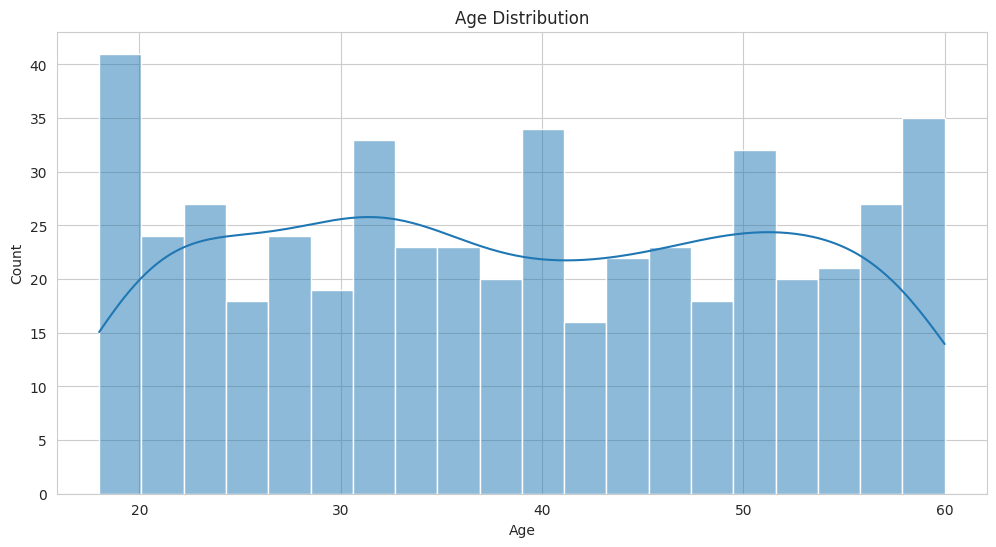

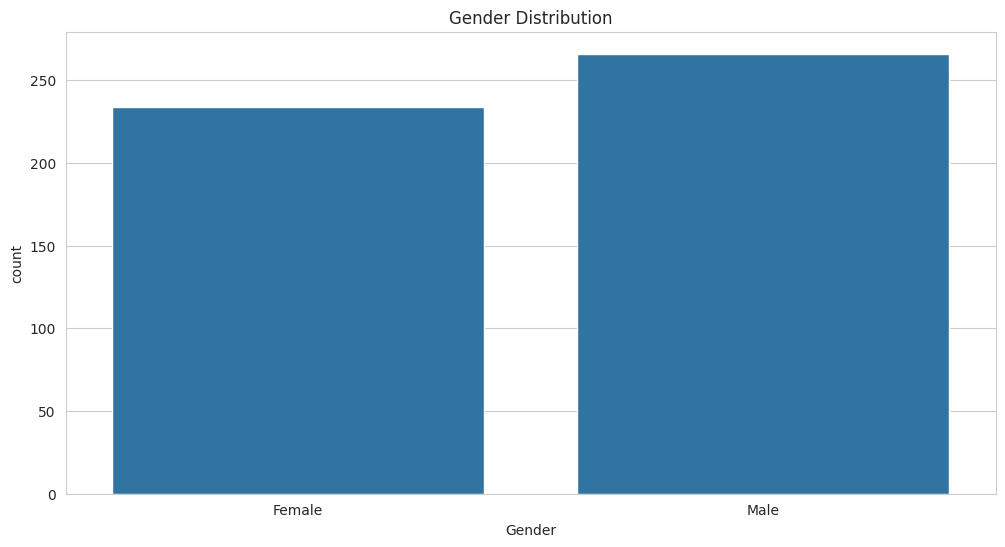

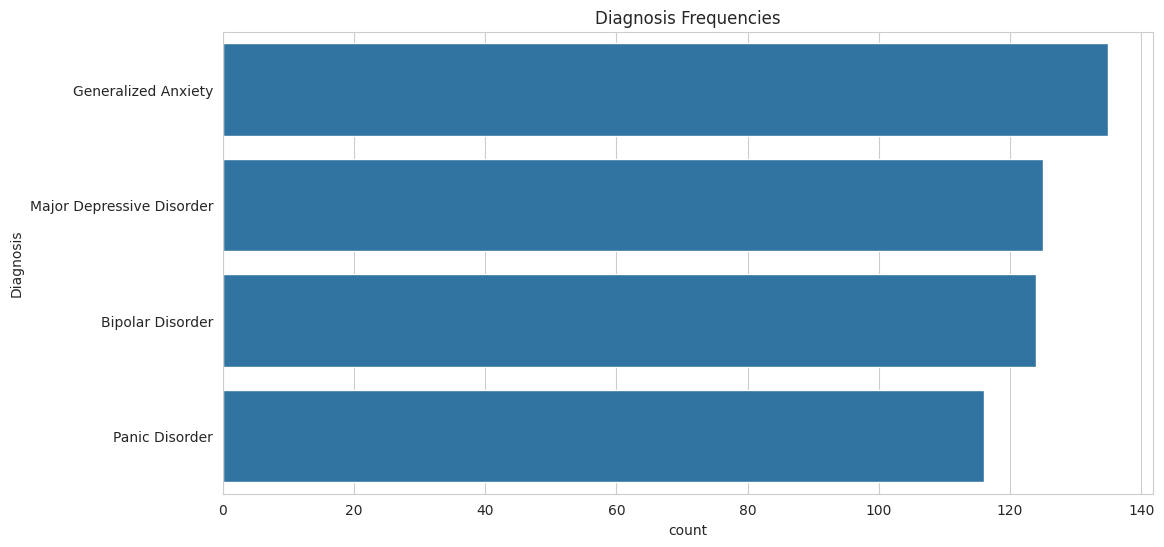

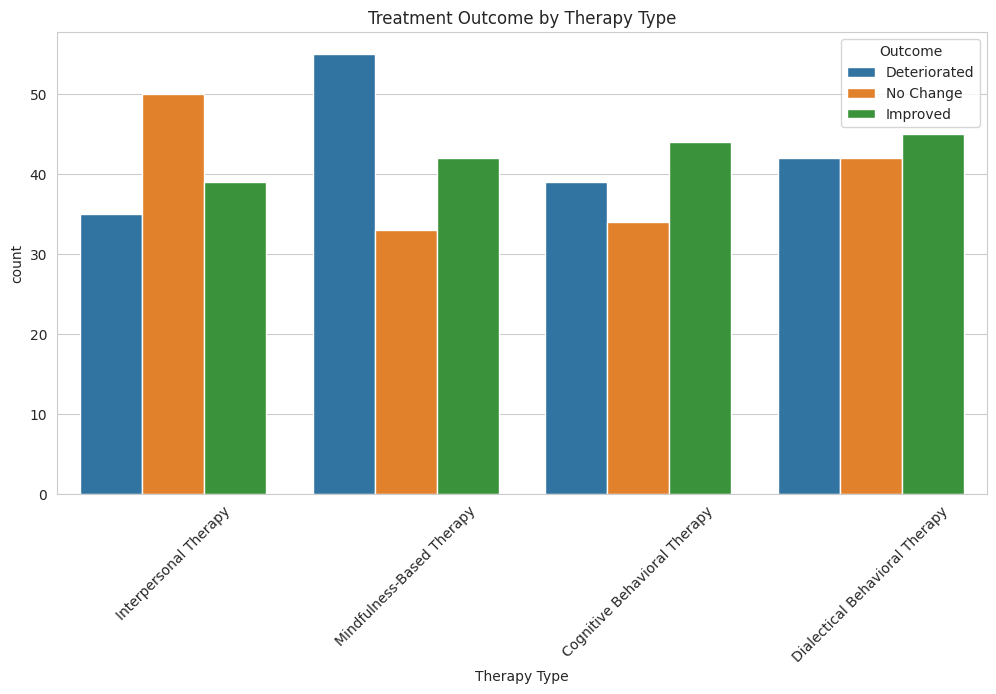

In [ ]:
# Overview of demographics and treatment
sns.histplot(df_treatment['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(data=df_treatment, x='Gender')
plt.title("Gender Distribution")
plt.show()

sns.countplot(data=df_treatment, y='Diagnosis', order=df_treatment['Diagnosis'].value_counts().index)
plt.title("Diagnosis Frequencies")
plt.show()

# Treatment outcome by therapy type
sns.countplot(data=df_treatment, x='Therapy Type', hue='Outcome')
plt.title("Treatment Outcome by Therapy Type")
plt.xticks(rotation=45)
plt.show()


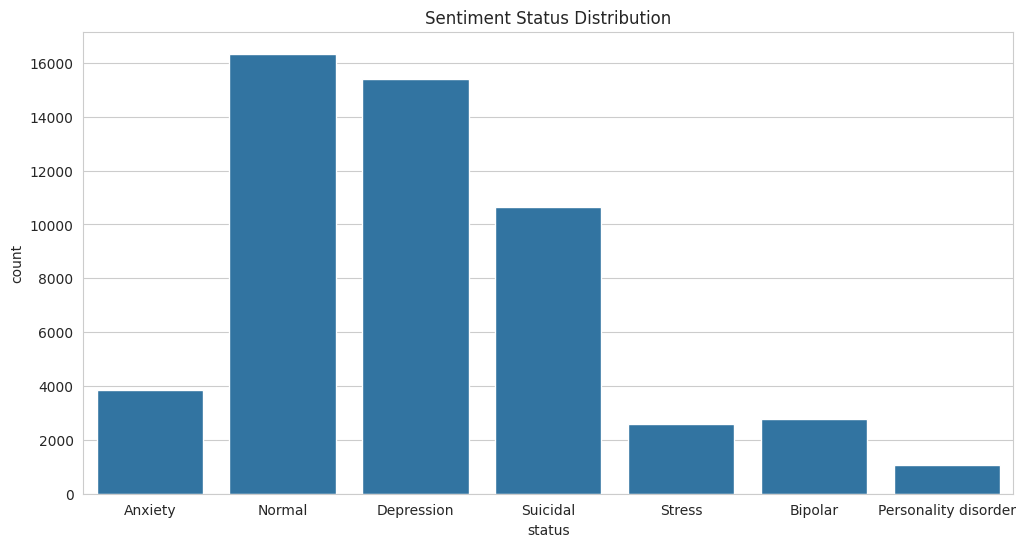

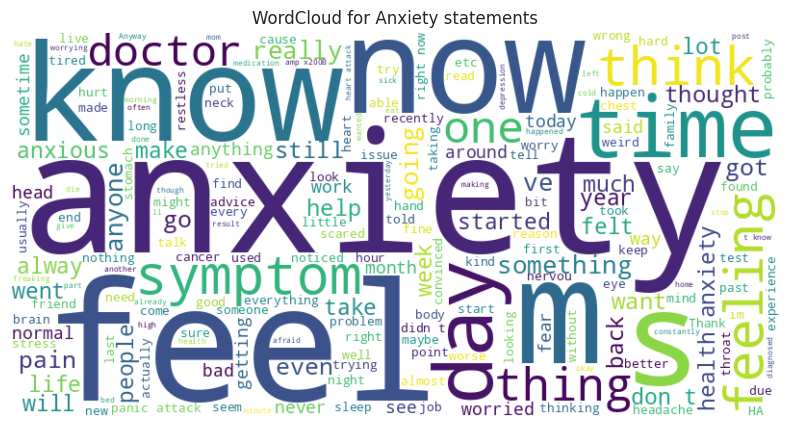

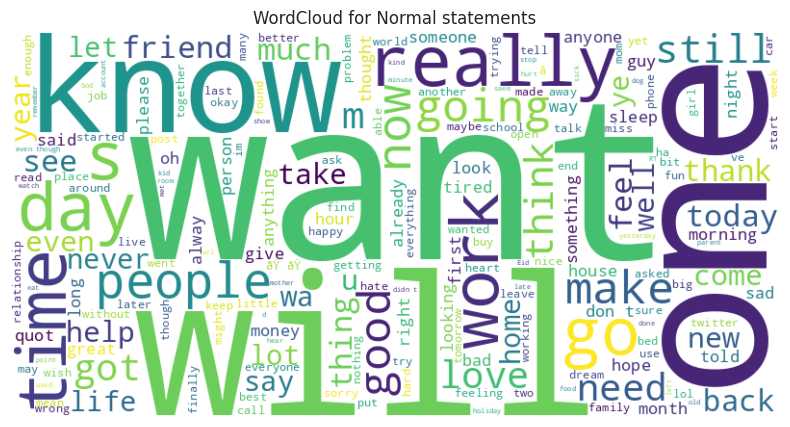

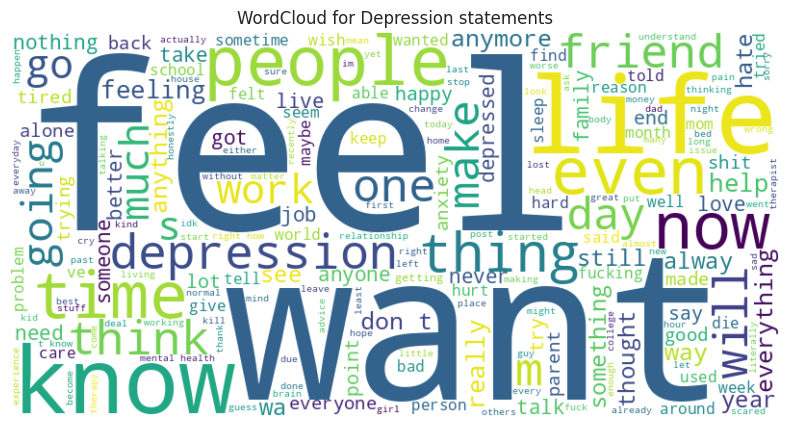

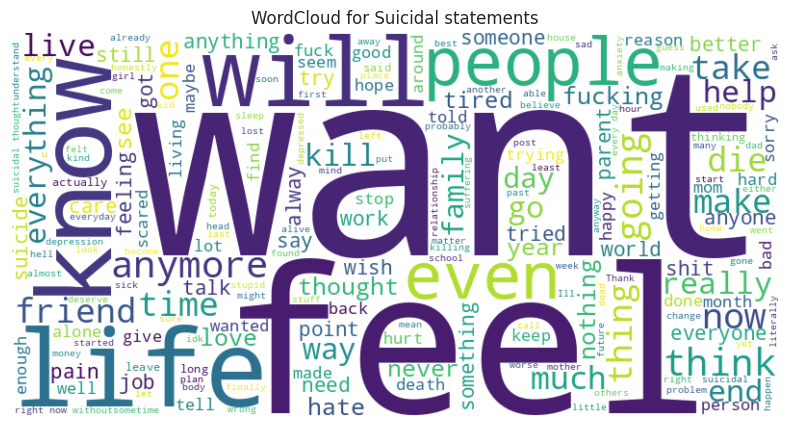

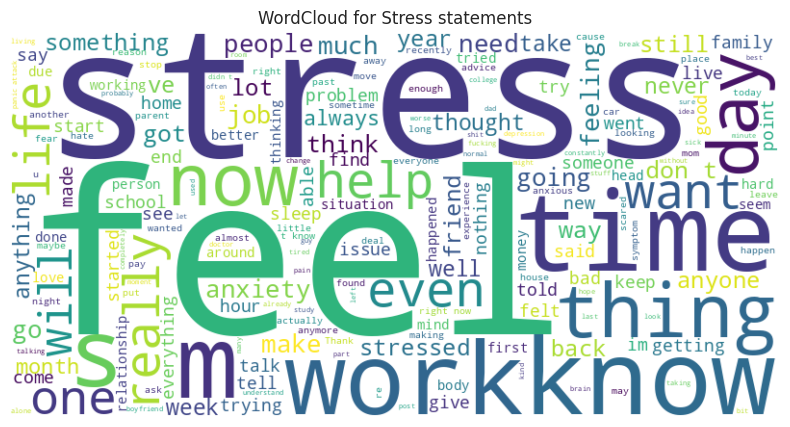

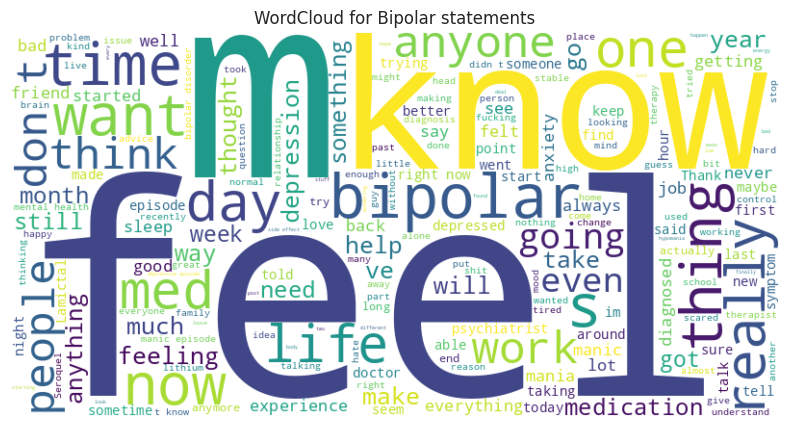

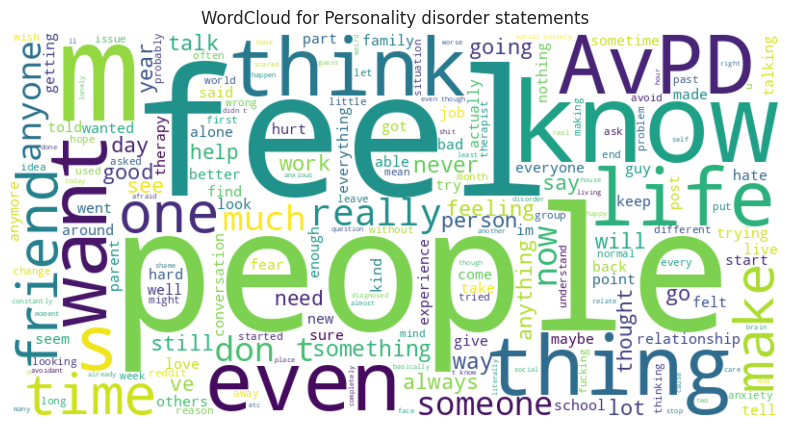

In [ ]:
# Sentiment class distribution
sns.countplot(data=df_sentiment, x='status')
plt.title("Sentiment Status Distribution")
plt.show()

# Word cloud by status
for status in df_sentiment['status'].unique():
    text = " ".join(df_sentiment[df_sentiment['status'] == status]['statement'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {status} statements")
    plt.show()


## Named Entity Recognition (NER)

In [ ]:
nlp = spacy.load("en_core_web_sm")

sample_texts = df_sentiment['statement'].sample(5, random_state=1)
for text in sample_texts:
    doc = nlp(text)
    print(f"Text: {text}")
    for ent in doc.ents:
        print(f"{ent.text} - {ent.label_}")
    print("-" * 80)


Text: i m and i have bad anxiety debilitating i haven t been able to keep a job since i wa so pretty much ever i wake up early morning hour before i have to be my heart race i black out i puke cough my body shake i have so much fear of being in danger when i leave my house i have the feeling of when will i ever be back i fear that wherever i m working isn t safe i ll be shot i have no issue seeing friend for the most part i do like driving myself so if i need to leave i can i m not relying on anyone feeling like this ha made me loose my job due to me calling out i ruined every job i ve ever had because i call out too much i call out because i m throwing up so much that my body won t move i pee myself i push through the hard morning snd i puke on myself in my car on the way or while i m working and with covid i wa sent home a lot mix that with my call out and i m fired i understand i hate that i m like this i want to be where i work especially now i have my dream job i ve called out tim

## Topic Modeling with LDA

In [ ]:
# Vectorize using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df_sentiment['statement'])

# Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Display top words per topic
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

display_topics(lda, tfidf.get_feature_names_out(), 10)


Topic 0:
just | like | feel | know | life | want | people | time | really | things

Topic 1:
job | work | money | school | yes | just | want | don | like | life

Topic 2:
want | just | life | die | like | feel | tired | fucking | know | anymore

Topic 3:
http | depression | ðÿ | com | rt | morning | don | good | twitter | https

Topic 4:
anxiety | ve | like | just | don | feel | sleep | doctor | day | heart



## Sentiment Classification Model

                      precision    recall  f1-score   support

             Anxiety       0.82      0.71      0.76       768
             Bipolar       0.87      0.65      0.74       556
          Depression       0.69      0.74      0.72      3081
              Normal       0.83      0.95      0.89      3269
Personality disorder       0.87      0.47      0.61       215
              Stress       0.69      0.39      0.50       517
            Suicidal       0.70      0.66      0.68      2131

            accuracy                           0.76     10537
           macro avg       0.78      0.65      0.70     10537
        weighted avg       0.76      0.76      0.75     10537



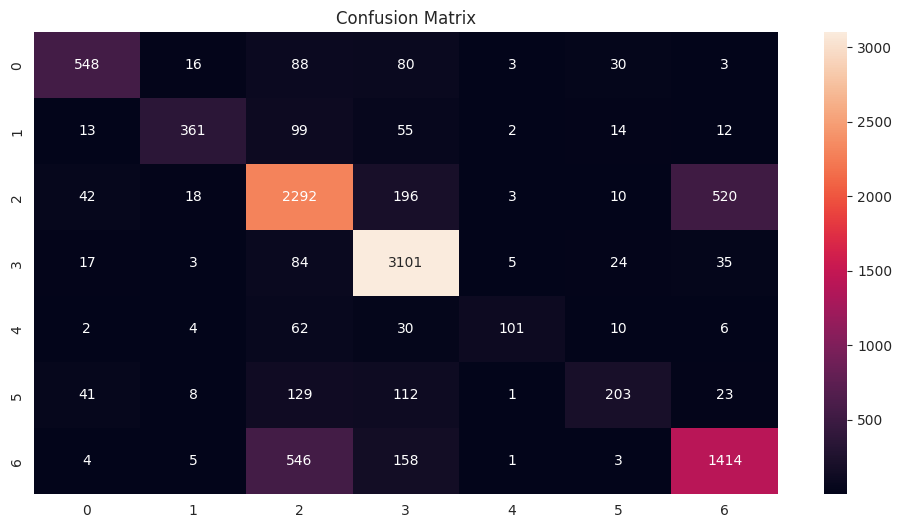

In [ ]:
from sklearn.linear_model import LogisticRegression

# Prepare data
X = tfidf_matrix
y = df_sentiment['status']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


## Trends

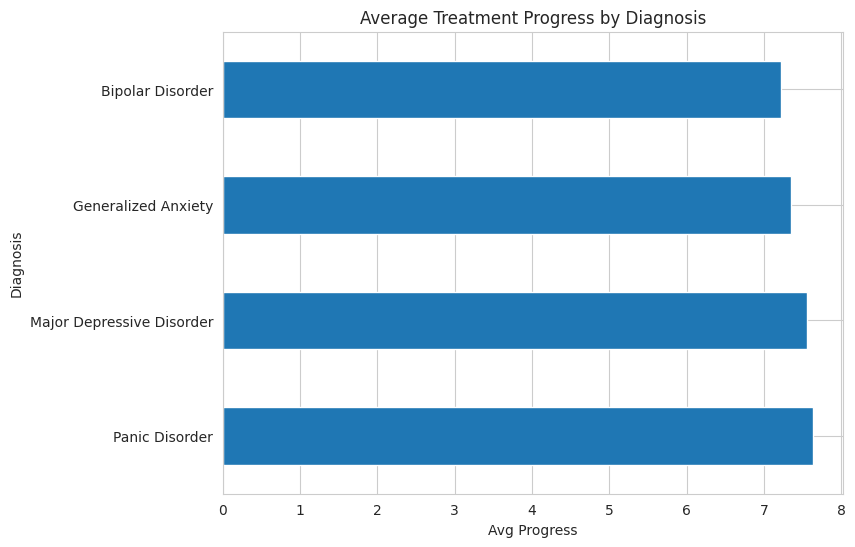

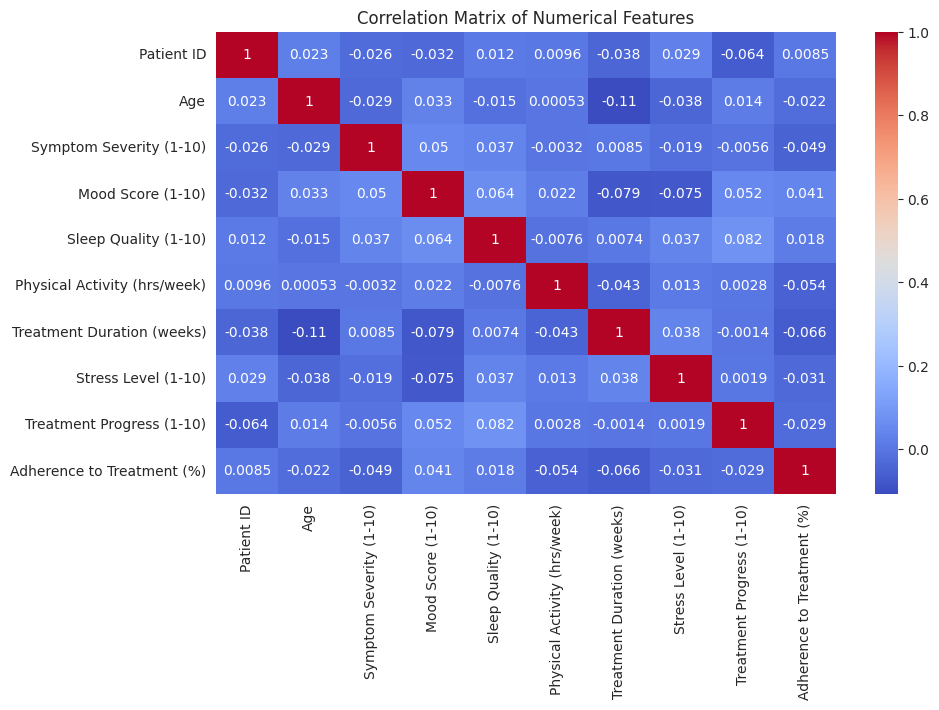

In [ ]:
# Average treatment progress by diagnosis
df_progress = df_treatment.groupby("Diagnosis")["Treatment Progress (1-10)"].mean().sort_values(ascending=False)
df_progress.plot(kind='barh', title="Average Treatment Progress by Diagnosis", figsize=(8,6))
plt.xlabel("Avg Progress")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_treatment.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


## SpaCy Prediction Model

In [ ]:
print(df_sentiment['status'].unique())

['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


In [ ]:
print(df_treatment['Diagnosis'].unique())

['Major Depressive Disorder' 'Panic Disorder' 'Generalized Anxiety'
 'Bipolar Disorder']


In [ ]:
status_to_diagnosis = {
    'Depression': 'Major Depressive Disorder',
    'Suicidal': 'Major Depressive Disorder',
    'Anxiety': 'Generalized Anxiety',
    'Stress': 'Generalized Anxiety',
    'Bipolar': 'Bipolar Disorder',
    'Personality disorder': 'Panic Disorder',  # Best-guess mapping
    'Normal': None  # We'll exclude these
}


In [ ]:
df_sentiment['Mapped Diagnosis'] = df_sentiment['status'].map(status_to_diagnosis)
df_sentiment = df_sentiment[df_sentiment['Mapped Diagnosis'].notnull()]

In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

nlp = spacy.load("en_core_web_sm")

def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer, max_features=5000)

X = vectorizer.fit_transform(df_sentiment['clean_statement'])
y = df_sentiment['Mapped Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                           precision    recall  f1-score   support

         Bipolar Disorder       0.90      0.66      0.77       554
      Generalized Anxiety       0.82      0.75      0.78      1256
Major Depressive Disorder       0.91      0.97      0.94      5221
           Panic Disorder       0.95      0.48      0.64       237

                 accuracy                           0.89      7268
                macro avg       0.89      0.72      0.78      7268
             weighted avg       0.89      0.89      0.89      7268





```

```

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get class labels and their coefficients
feature_names = vectorizer.get_feature_names_out()
coefs = clf.coef_
labels = clf.classes_

# Plot top N words for each diagnosis
def plot_top_words(coefs, feature_names, labels, top_n=10):
    for idx, label in enumerate(labels):
        top_features = np.argsort(coefs[idx])[-top_n:]
        plt.figure(figsize=(8, 4))
        sns.barplot(
            x=coefs[idx][top_features],
            y=[feature_names[i] for i in top_features],
            palette="viridis"
        )
        plt.title(f"Top {top_n} words for '{label}'")
        plt.xlabel("Coefficient")
        plt.ylabel("Word")
        plt.tight_layout()
        plt.show()

plot_top_words(coefs, feature_names, labels, top_n=10)


## SpaCy Model with XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()

# Fit the encoder to the 'y_train' labels and transform both 'y_train' and 'y_test'
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train_encoded)

y_pred_xgb_encoded = xgb_clf.predict(X_test)

y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:03:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.908778205833792

XGBoost Classification Report:
                            precision    recall  f1-score   support

         Bipolar Disorder       0.88      0.73      0.80       554
      Generalized Anxiety       0.83      0.79      0.81      1256
Major Depressive Disorder       0.93      0.97      0.95      5221
           Panic Disorder       0.96      0.59      0.73       237

                 accuracy                           0.91      7268
                macro avg       0.90      0.77      0.82      7268
             weighted avg       0.91      0.91      0.91      7268



## Comparison of SpaCy and XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:11:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


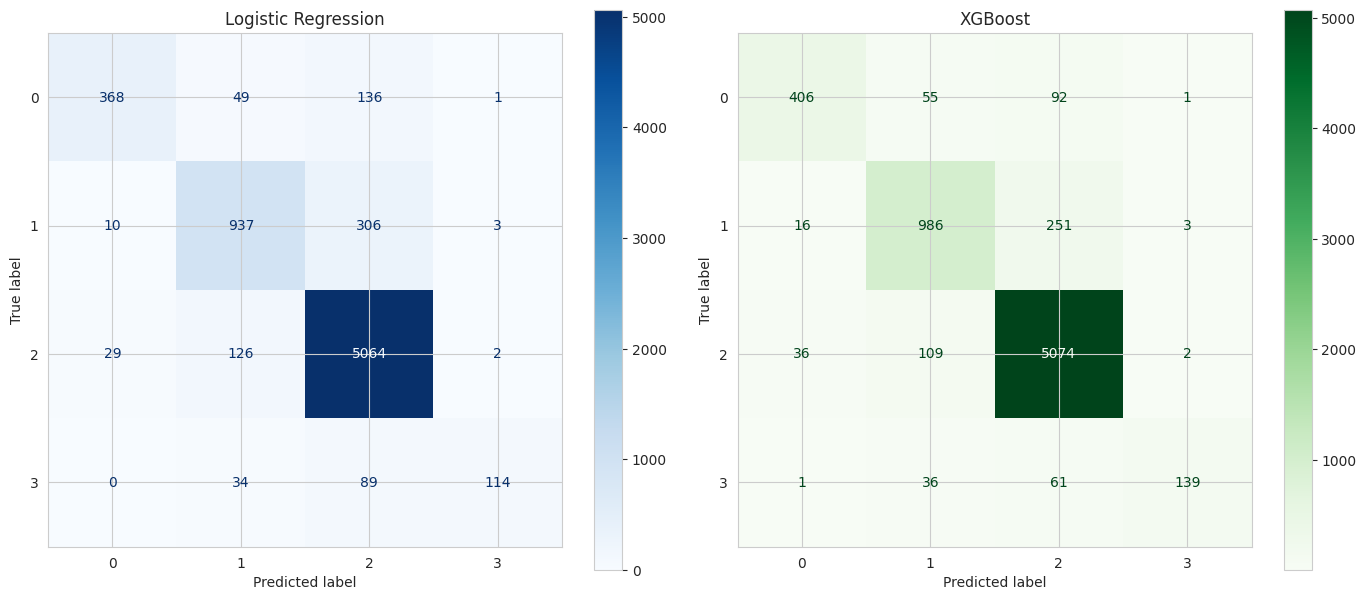

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train_encoded)  # Use the encoded labels for training
y_pred_logreg = clf.predict(X_test)

# Train the XGBoost model
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_clf.predict(X_test)

# Create confusion matrix plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test_encoded, y_pred_logreg)
ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=clf.classes_).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")

# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_clf.classes_).plot(ax=axes[1], cmap='Greens')
axes[1].set_title("XGBoost")

plt.tight_layout()
plt.show()


# Insights and Conclusions
Our final models demonstrated strong performance in classifying mapped diagnoses from sentiment text. Notably:
- **XGBoost achieved an overall accuracy of 91%**, with particularly high precision and recall scores for Major Depressive Disorder and Generalized Anxiety.
- The logistic regression model also performed well, particularly on major depressive cases, suggesting these models can effectively distinguish between various mental health states based on text alone.
- The use of TF-IDF vectorization combined with lemmatization significantly improved the performance of topic modeling (via LDA) and classification tasks.
From our exploratory analysis, we observed that certain sentiment theses-such as expressions of hopelessness, isolation, or stress- were strongly associated with depressive and anxiety disorders. Topic modeling surfaced recurring concerns around therapy, medication, relationships, and daily stressors, highlighting common psychological stress points that might inform treatment strategies.

Our results suggest that machine learning applied to publicly shared sentiment data can be a powerful tool for early mental health detection and clinical insight. While more work is needed to integrate these findings into real-world healthcare workflows, our project lays evidence for using AI to support mental health interventions, especially in the early identification of mood disorders.